In [1]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [2]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,5)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,5)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,5)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,5)

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.524  buffer =  0.02524
radius_vspp_wind km =  0.8410000000000001  buffer =  0.00841
radius_spp_solar km =  1.3820000000000001  buffer =  0.01382
radius_vspp_solar km =  0.461  buffer =  0.00461


In [3]:
scenario_SI = 0

xr_out = xr.open_dataset('Output\\xr_output_scenario_SI_' + str(scenario_SI) + '_.nc')
print(xr_out)
print("cap_wind = ",xr_out['cap_wind'].sum())
print("cap_solar = ",xr_out['cap_solar'].sum())

<xarray.Dataset>
Dimensions:    (lat: 1069, lon: 597)
Coordinates:
  * lat        (lat) float64 5.621 5.635 5.649 5.663 ... 20.41 20.43 20.44 20.45
  * lon        (lon) float64 97.35 97.37 97.38 97.39 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 ...
    SI_Wind    (lat, lon) float64 ...
    AVA_Wind   (lat, lon) float32 ...
    AVA_Solar  (lat, lon) float32 ...
    ADM1_EN    (lat, lon) object ...
    region     (lat, lon) object ...
    cap_wind   (lat, lon) float64 ...
    cap_solar  (lat, lon) float64 ...
cap_wind =  <xarray.DataArray 'cap_wind' ()>
array(13103.37045953)
cap_solar =  <xarray.DataArray 'cap_solar' ()>
array(1214414.13671801)


In [4]:
df_wind = xr_out.to_dataframe()
xr_out.close()
df_wind.reset_index(inplace=True)
df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
df_wind.crs = {'init': 'epsg:4326'}
print(len(df_wind))
for i,c in enumerate(df_wind.columns):
    if c not in (['lon','lat','SI_Wind','SI_Wind_max','SI_Wind_min','region','ADM1_EN','cap_wind','AVA_Wind','geometry']):
        df_wind = df_wind.drop(columns=c)

df_wind = df_wind.loc[df_wind['cap_wind'] > 0]
df_wind.reset_index(inplace=True,drop=False)
df_wind.crs = {'init': 'epsg:4326'}
df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)
df_wind = df_wind.set_geometry('buffer')

df_wind.to_csv('Output\\Output_wind_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_wind)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


638193


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_20636\3128496745.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)


       index        lat         lon   SI_Wind  AVA_Wind     ADM1_EN region  \
0      31310   6.343056  101.045833  0.507800      0.90        Yala     R3   
1      31906   6.356944  101.031944  0.511859      0.90        Yala     R3   
2      31914   6.356944  101.143056  0.237255      0.45        Yala     R3   
3      31915   6.356944  101.156944  0.226208      0.45        Yala     R3   
4      32510   6.370833  101.129167  0.207354      0.36        Yala     R3   
...      ...        ...         ...       ...       ...         ...    ...   
4932  614543  19.912500  100.545833  0.112599      0.27  Chiang Rai     R4   
4933  614544  19.912500  100.559722  0.733388      1.71  Chiang Rai     R4   
4934  615110  19.926389  100.129167  1.402229      2.25  Chiang Rai     R4   
4935  615140  19.926389  100.545833  0.110012      0.27  Chiang Rai     R4   
4936  615141  19.926389  100.559722  0.523765      1.26  Chiang Rai     R4   

      cap_wind                    geometry  \
0        4.050   

In [5]:
df_solar = xr_out.to_dataframe()
df_solar.reset_index(inplace=True)
df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
df_solar.crs = {'init': 'epsg:4326'}
print(len(df_solar))
for i,c in enumerate(df_solar.columns):
    if c not in (['lon','lat','SI_Solar','SI_Solar_max','SI_Solar_min','region','ADM1_EN','cap_solar','AVA_Solar','geometry']):
        df_solar = df_solar.drop(columns=c)

df_solar = df_solar.loc[df_solar['cap_solar'] > 0]
df_solar.reset_index(inplace=True,drop=False)
df_solar.crs = {'init': 'epsg:4326'}
df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)
df_solar = df_solar.set_geometry('buffer')

df_solar.to_csv('Output\\Output_solar_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_solar)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


638193


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_20636\4263331687.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)


        index        lat         lon  SI_Solar  AVA_Solar     ADM1_EN region  \
0        8631   5.815278  101.143056  0.063453       0.09        Yala     R3   
1       12265   5.898611  101.865278  0.626819       0.63  Narathiwat     R3   
2       12266   5.898611  101.879167  0.732460       0.72  Narathiwat     R3   
3       12861   5.912500  101.851389  0.236434       0.27  Narathiwat     R3   
4       12862   5.912500  101.865278  0.080546       0.09  Narathiwat     R3   
...       ...        ...         ...       ...        ...         ...    ...   
91653  635405  20.398611  100.087500  0.299122       0.36  Chiang Rai     R4   
91654  635406  20.398611  100.101389  1.259007       1.35  Chiang Rai     R4   
91655  635407  20.398611  100.115278  0.260293       0.27  Chiang Rai     R4   
91656  636003  20.412500  100.101389  0.480349       0.54  Chiang Rai     R4   
91657  636004  20.412500  100.115278  1.084206       1.17  Chiang Rai     R4   

       cap_solar                    geo

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  13103.370459528129
R0 wind =  0.0
R1 wind =  1411.83005060269
R2 wind =  6076.215227500419
R3 wind =  4359.82514441041
R4 wind =  1255.50003701461


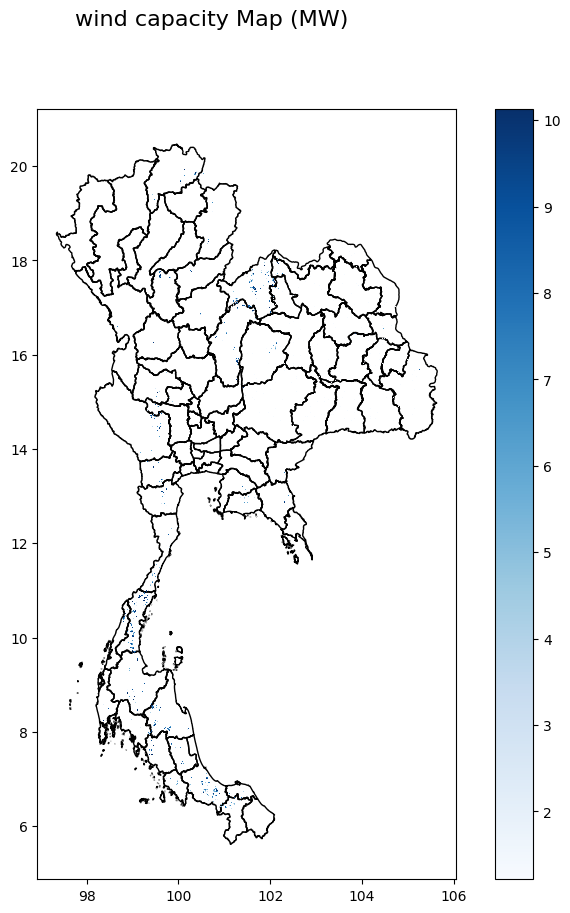

In [6]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind['cap_wind'].sum())
print("R0 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R0'].sum())
print("R1 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R1'].sum())
print("R2 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R2'].sum())
print("R3 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R3'].sum())
print("R4 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('wind capacity Map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_wind.plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None

total solar capacity =  1214414.1367180136
R0 Solar =  5714.55015599714
R1 Solar =  257813.55751185093
R2 Solar =  507409.66645090614
R3 Solar =  159877.80469491179
R4 Solar =  283598.55790434766


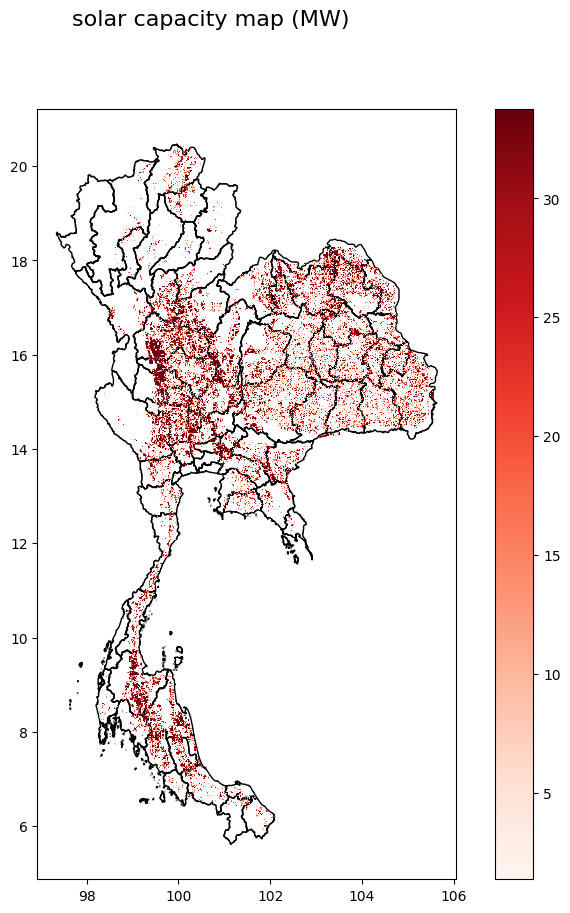

In [7]:
print("total solar capacity = ", df_solar['cap_solar'].sum())
print("R0 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R0'].sum())
print("R1 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R1'].sum())
print("R2 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R2'].sum())
print("R3 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R3'].sum())
print("R4 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('solar capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_solar.plot(ax = ax,legend=True,zorder = 1,column = 'cap_solar',cmap = 'Reds')
except:
    None


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  284.7150101066
total solar capacity =  27602.10085362089


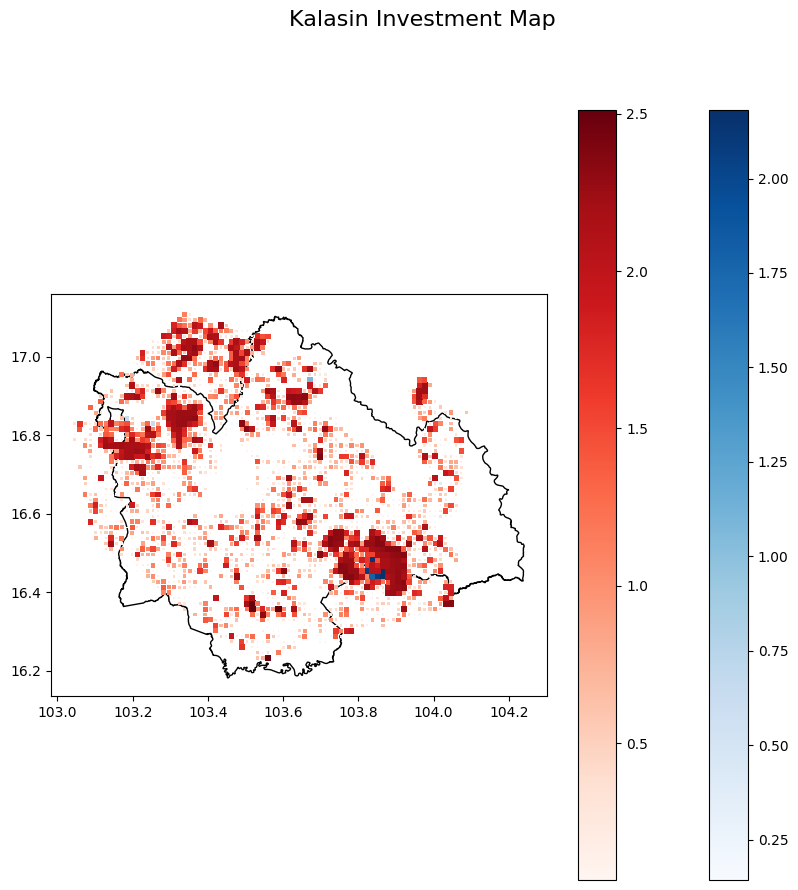

In [9]:
province = 'Kalasin'
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
specificarea = thailandmap.loc[thailandmap['ADM1_EN'] == province]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['ADM1_EN'] == province].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['ADM1_EN'] == province].sum())


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(province + ' Investment Map (SI)', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 1,column = 'SI_Wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'SI_Solar',cmap = 'Reds')
except:
    None


total wind capacity =  284.7150101066
total solar capacity =  27602.10085362089


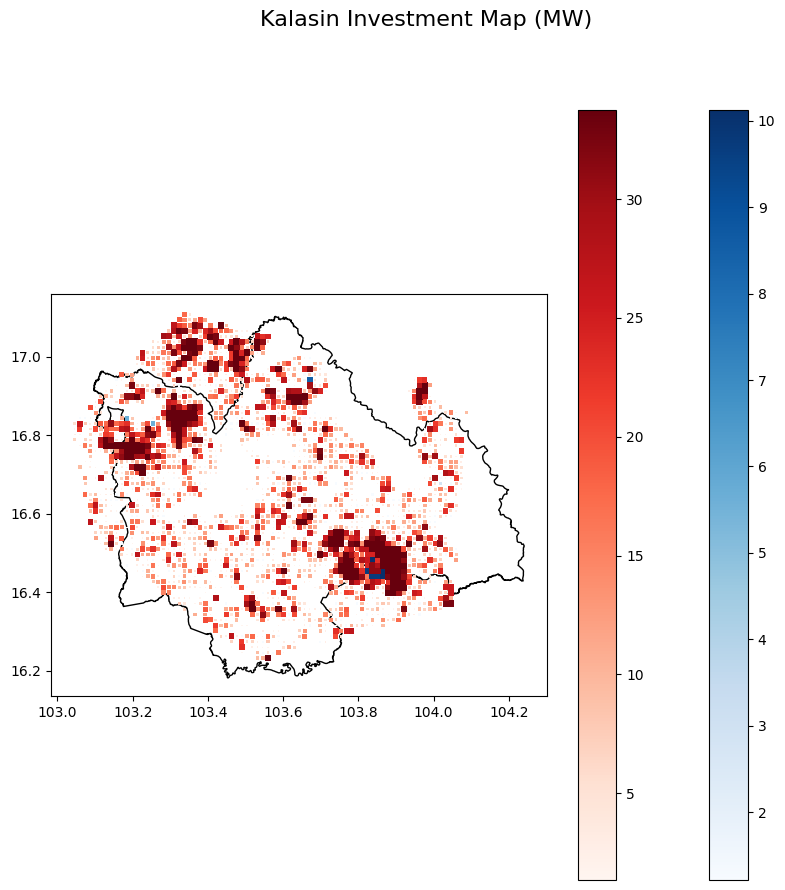

In [10]:
print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['ADM1_EN'] == province].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['ADM1_EN'] == province].sum())


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(province + ' Investment Map (MW)', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'cap_solar',cmap = 'Reds')
except:
    None